<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/LSTM_tfkeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM_Keras

In [1]:
!pip install tensorflow-gpu===2.1.0

     |████████████████████████████████| 421.8MB 40kB/s 
     |████████████████████████████████| 3.9MB 40.7MB/s 
     |████████████████████████████████| 450kB 46.3MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

tf.__version__

'2.1.0'

In [6]:
df = pd.read_csv('http://linkededucation.com.br/temp/google_stock_price.csv')
df.head()

,Stock_Price
0,50.12
1,54.10
2,54.65
3,52.38
4,52.95


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 1 columns):
Stock_Price    3012 non-null float64
dtypes: float64(1)
memory usage: 23.7 KB


In [8]:
df['Stock_Price'].describe()

count    3012.000000
mean      334.310093
std       173.187205
min        49.950000
25%       218.045000
50%       283.315000
75%       443.000000
max       782.220000
Name: Stock_Price, dtype: float64

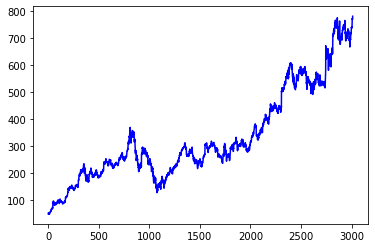

In [9]:
#Gráfico do ativo
plt.plot(df,color='blue')
plt.show()

In [11]:
#Criação das janelas de 8 dias no dataframe..inicializadas com zero
df['d1']=0.0
df['d2']=0.0
df['d3']=0.0
df['d4']=0.0
df['d5']=0.0
df['d6']=0.0
df['d7']=0.0
df['target']=0.0

df.head()

,Stock_Price,d1,d2,d3,d4,d5,d6,d7,target
0,50.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,54.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,54.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#populando as janelas temporais
for i in range(2900):
  df.iloc[i,1]=df.iloc[i+1,0]
  df.iloc[i,2]=df.iloc[i+2,0]
  df.iloc[i,3]=df.iloc[i+3,0]
  df.iloc[i,4]=df.iloc[i+4,0]
  df.iloc[i,5]=df.iloc[i+5,0]
  df.iloc[i,6]=df.iloc[i+6,0]
  df.iloc[i,7]=df.iloc[i+7,0]
  df.iloc[i,8]=df.iloc[i+8,0]

ndf=df[:2800].copy()
y=np.array(ndf['target'])
ndf=ndf.drop(columns='target',axis=1)
ndf.rename(columns={"Stock_Price": "d0"},inplace=True)
ndf.head()

,d0,d1,d2,d3,d4,d5,d6,d7
0,50.12,54.10,54.65,52.38,52.95,53.90,53.02,50.95
1,54.10,54.65,52.38,52.95,53.90,53.02,50.95,51.13
2,54.65,52.38,52.95,53.90,53.02,50.95,51.13,50.07
3,52.38,52.95,53.90,53.02,50.95,51.13,50.07,50.70
4,52.95,53.90,53.02,50.95,51.13,50.07,50.70,49.95


In [14]:
X=np.array(ndf)
print(X.shape)
print(X[:3])
print(X.shape)
X=X[:,:,np.newaxis]
print(X.shape)
X[:3],y[:3]

(2800, 8)
[[50.12 54.1  54.65 52.38 52.95 53.9  53.02 50.95]
 [54.1  54.65 52.38 52.95 53.9  53.02 50.95 51.13]
 [54.65 52.38 52.95 53.9  53.02 50.95 51.13 50.07]]
(2800, 8)
(2800, 8, 1)


(array([[[50.12],
         [54.1 ],
         [54.65],
         [52.38],
         [52.95],
         [53.9 ],
         [53.02],
         [50.95]],
 
        [[54.1 ],
         [54.65],
         [52.38],
         [52.95],
         [53.9 ],
         [53.02],
         [50.95],
         [51.13]],
 
        [[54.65],
         [52.38],
         [52.95],
         [53.9 ],
         [53.02],
         [50.95],
         [51.13],
         [50.07]]]), array([51.13, 50.07, 50.7 ]))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(40, input_shape=(None, 1)))
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation=lambda x: x))

model.compile(optimizer='adam', loss='mse')

In [21]:
model.layers[0].get_config()

{'activation': 'tanh',
 'activity_regularizer': None,
 'batch_input_shape': (None, None, 1),
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dropout': 0.0,
 'dtype': 'float32',
 'go_backwards': False,
 'implementation': 2,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'name': 'lstm_1',
 'recurrent_activation': 'sigmoid',
 'recurrent_constraint': None,
 'recurrent_dropout': 0.0,
 'recurrent_initializer': {'class_name': 'Orthogonal',
  'config': {'gain': 1.0, 'seed': None}},
 'recurrent_regularizer': None,
 'return_sequences': False,
 'return_state': False,
 'stateful': False,
 'time_major': False,
 'trainable': True,
 'unit_forget_bias': True,
 'units': 40,
 'unroll': False,
 'use_bias': True}

In [22]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Train on 1876 samples
Epoch 1/100
1876/1876 [==============================] - 7s 4ms/sample - loss: 114482.2825
Epoch 2/100
1876/1876 [==============================] - 0s 121us/sample - loss: 109695.6818
Epoch 3/100
1876/1876 [==============================] - 0s 125us/sample - loss: 88019.0511
Epoch 4/100
1876/1876 [==============================] - 0s 116us/sample - loss: 55474.9249
Epoch 5/100
1876/1876 [==============================] - 0s 111us/sample - loss: 29254.6319
Epoch 6/100
1876/1876 [==============================] - 0s 118us/sample - loss: 14462.1832
Epoch 7/100
1876/1876 [==============================] - 0s 123us/sample - loss: 6906.5132
Epoch 8/100
1876/1876 [==============================] - 0s 125us/sample - loss: 3061.6034
Epoch 9/100
1876/1876 [==============================] - 0s 121us/sample - loss: 1331.8591
Epoch 10/100
1876/1876 [==============================] - 0s 111us/sample - loss: 630.7403
Epoch 11/100
1876/1876 [==============================] - 0s 1

In [23]:
model.evaluate(X_test,y_test)

924/924 [==============================] - 0s 329us/sample - loss: 35.3585


35.35851993395653

In [0]:
model1 = tf.keras.Sequential()
#crie um modelo MLP para comparar

In [25]:
model.layers[1].get_config(), model.layers[2].get_config()

({'activation': 'relu',
  'activity_regularizer': None,
  'bias_constraint': None,
  'bias_initializer': {'class_name': 'Zeros', 'config': {}},
  'bias_regularizer': None,
  'dtype': 'float32',
  'kernel_constraint': None,
  'kernel_initializer': {'class_name': 'GlorotUniform',
   'config': {'seed': None}},
  'kernel_regularizer': None,
  'name': 'dense_3',
  'trainable': True,
  'units': 20,
  'use_bias': True},
 {'activation': 'relu',
  'activity_regularizer': None,
  'bias_constraint': None,
  'bias_initializer': {'class_name': 'Zeros', 'config': {}},
  'bias_regularizer': None,
  'dtype': 'float32',
  'kernel_constraint': None,
  'kernel_initializer': {'class_name': 'GlorotUniform',
   'config': {'seed': None}},
  'kernel_regularizer': None,
  'name': 'dense_4',
  'trainable': True,
  'units': 10,
  'use_bias': True})

In [0]:
# fit model
model1.fit(X_train, y_train, epochs=100, verbose=1)

In [0]:
model1.evaluate(X_test,y_test)

In [33]:
X[0][0], X[0][1], X[0][2], X[0][3], X[0][4], model.predict(np.array([[X[0][0], X[0][1], X[0][2], X[0][3], X[0][4]]])), X[0][5]

(array([50.12]),
 array([54.1]),
 array([54.65]),
 array([52.38]),
 array([52.95]),
 array([[52.469894]], dtype=float32),
 array([53.9]))

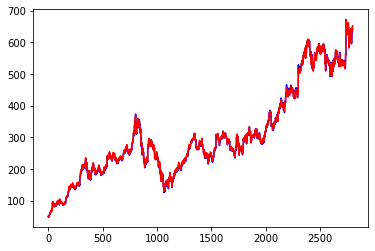

In [34]:
ye=model.predict(X)
import matplotlib.pyplot as plt
plt.plot(ye,color='blue')
plt.plot(y,color='red')
plt.show()

In [48]:
# Example using a Default Neural Network instead of LSTM Network. The result is terrible.

model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(1000, activation='relu', input_shape=(None, 1)))
model1.add(tf.keras.layers.Dense(1, activation=lambda x: x))

model1.compile(optimizer='adam', loss='mse')

model1.fit(X_train, y_train, epochs=100, verbose=True)

model1.evaluate(X_test, y_test)

Train on 1876 samples
Epoch 1/100
1876/1876 [==============================] - 1s 402us/sample - loss: 7391.1935
Epoch 2/100
1876/1876 [==============================] - 0s 146us/sample - loss: 178.9784
Epoch 3/100
1876/1876 [==============================] - 0s 143us/sample - loss: 165.9232
Epoch 4/100
1876/1876 [==============================] - 0s 136us/sample - loss: 158.8149
Epoch 5/100
1876/1876 [==============================] - 0s 142us/sample - loss: 157.4934
Epoch 6/100
1876/1876 [==============================] - 0s 145us/sample - loss: 165.5580
Epoch 7/100
1876/1876 [==============================] - 0s 130us/sample - loss: 166.6896
Epoch 8/100
1876/1876 [==============================] - 0s 138us/sample - loss: 158.3200
Epoch 9/100
1876/1876 [==============================] - 0s 154us/sample - loss: 161.4313
Epoch 10/100
1876/1876 [==============================] - 0s 141us/sample - loss: 159.1509
Epoch 11/100
1876/1876 [==============================] - 0s 133us/sample - 

166.1257368475844

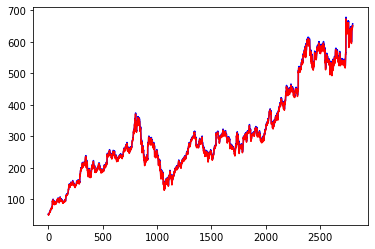

((2800, 8, 1), (2800,))

In [79]:
ye1=model1.predict(X)

ye1[1]

ye_test = []
for i in range(len(ye1)):
  ye_test.append(ye1[i][len(ye1[i]) - 1][0])

ye_test[:3], ye1

import matplotlib.pyplot as plt
plt.plot(ye_test,color='blue')
plt.plot(y,color='red')
plt.show()

ye1.shape, y.shape

